In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [42]:
# Importamos el dataset para entrenar
data = pd.read_excel('Data\E-Commerce_train.xlsx')

In [43]:
#Exploramos los datos para familiarizarnos con las columnas y su contenido
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [44]:
#Buscar datos faltantes 
True in data.isnull().values

False

In [45]:
#Revisamos las variables categóricas en busca de valores incorrectos
print(data['Warehouse_block'].unique())
print(data['Mode_of_Shipment'].unique())
print(data['Product_importance'].unique())
print(data['Gender'].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [46]:
# Se buscan outliers o comportamientos atípicos
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [47]:
#Separamos las variables numéricas de las categóricas para tratar las categóricas
numerica = data.drop(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)
numerica.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


In [48]:
categoricas = data.filter(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
categoricas_e = categoricas.copy()
categoricas.tail()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
8994,D,Ship,low,F
8995,F,Ship,medium,M
8996,A,Ship,medium,F
8997,B,Ship,medium,F
8998,C,Ship,low,M


In [49]:
from sklearn.preprocessing import OrdinalEncoder

encoder1 = OrdinalEncoder(categories=[sorted(np.array(data['Warehouse_block'].unique()))])
encoder2 = OrdinalEncoder(categories=[sorted(np.array(data['Mode_of_Shipment'].unique()))])
encoder3 = OrdinalEncoder(categories=[sorted(np.array(data['Product_importance'].unique()))])
encoder4 = OrdinalEncoder(categories=[sorted(np.array(data['Gender'].unique()))])

In [50]:
encoder1.fit(categoricas[['Warehouse_block']])
encoder2.fit(categoricas[['Mode_of_Shipment']])
encoder3.fit(categoricas[['Product_importance']])
encoder4.fit(categoricas[['Gender']])

OrdinalEncoder(categories=[['F', 'M']])

In [51]:
categoricas_e["Warehouse_block"] = encoder1.transform(categoricas[["Warehouse_block"]])
categoricas_e["Mode_of_Shipment"] = encoder2.transform(categoricas[["Mode_of_Shipment"]])
categoricas_e["Product_importance"] = encoder3.transform(categoricas[["Product_importance"]])
categoricas_e["Gender"] = encoder4.transform(categoricas[["Gender"]])

In [52]:
categoricas_e

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,3.0,0.0,1.0,0.0
1,4.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0
3,1.0,0.0,2.0,1.0
4,2.0,0.0,2.0,0.0
...,...,...,...,...
8994,3.0,2.0,1.0,0.0
8995,4.0,2.0,2.0,1.0
8996,0.0,2.0,2.0,0.0
8997,1.0,2.0,2.0,0.0


In [53]:
categoricas_e.describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,8999.000000,8999.000000,8999.000000,8999.000000
mean,2.333148,1.519502,1.336148,0.495499
std,1.490774,0.755827,0.639007,0.500008
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000
75%,4.000000,2.000000,2.000000,1.000000
max,4.000000,2.000000,2.000000,1.000000


In [54]:
datos_e = pd.concat([numerica,categoricas_e],axis=1)
datos_e

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,4,2,177,3,44,1233,1,3.0,0.0,1.0,0.0
1,4,5,216,2,59,3088,1,4.0,0.0,1.0,1.0
2,2,2,183,4,48,3374,1,0.0,0.0,1.0,1.0
3,3,3,176,4,10,1177,1,1.0,0.0,2.0,1.0
4,2,2,184,3,46,2484,1,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,4177,1,3.0,2.0,1.0,0.0
8995,5,3,232,3,3,4526,0,4.0,2.0,2.0,1.0
8996,4,5,260,3,6,4221,0,0.0,2.0,2.0,0.0
8997,4,2,184,3,5,5931,1,1.0,2.0,2.0,0.0


In [55]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
X = datos_e.drop('Reached.on.Time_Y.N', axis=1)
y = datos_e['Reached.on.Time_Y.N']

In [57]:
X = StandardScaler().fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
print(X_train.shape,y_train.shape, X.shape, y.shape)

(6299, 10) (6299,) (8999, 10) (8999,)


In [60]:
pca = PCA(n_components = 3)
pca.fit(X_train)

PCA(n_components=3)

In [61]:
ipca = IncrementalPCA(n_components=3,batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

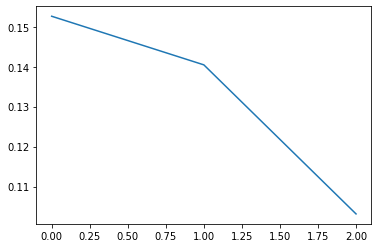

In [62]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

logistic = LogisticRegression(solver='lbfgs')
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
log_predic = logistic.predict(dt_test)
print('Precision PCA: %.3f' % precision_score(y_test, log_predic))


dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
log_predic=logistic.predict(dt_test)
print('Precision IPCA: %.3f' % precision_score(y_test, log_predic))

Precision PCA: 0.742
Precision IPCA: 0.744


Precision PCA con 2 componentes: 0.7425014148273911
Precision PCA con 3 componentes: 0.7421348314606742
Precision PCA con 4 componentes: 0.7425519955030916
Precision PCA con 5 componentes: 0.7418630751964085
Precision PCA con 6 componentes: 0.7448004496908376
Precision PCA con 7 componentes: 0.7431141090500281
Precision PCA con 8 componentes: 0.7438202247191011
Precision PCA con 9 componentes: 0.7510086455331412
Precision PCA con 10 componentes: 0.7470794392523364


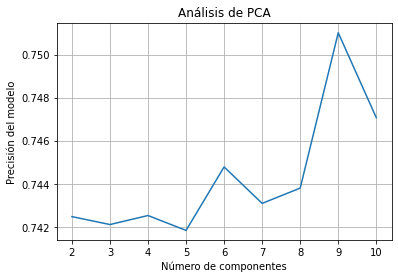

In [94]:
logistic = LogisticRegression(solver='lbfgs')
precisionpca = []
components = list(range(2, 11))

for i in components:
    pca = PCA(n_components = i)
    pca.fit(X_train)
    dt_train = pca.transform(X_train)
    dt_test = pca.transform(X_test)
    logistic.fit(dt_train, y_train)
    log_predic = logistic.predict(dt_test)
    score = precision_score(y_test, log_predic)
    precisionpca.append(score)
    print(f'Precision PCA con {i} componentes: {score}')

plt.plot(components, precisionpca)
plt.xlabel('Número de componentes')
plt.ylabel('Precisión del modelo')
plt.title('Análisis de PCA')
plt.grid()
plt.show()

Precision IPCA con 2 componentes: 0.7377326565143824
Precision IPCA con 3 componentes: 0.7438063063063063
Precision IPCA con 4 componentes: 0.7464629315223543
Precision IPCA con 5 componentes: 0.7364297705651931
Precision IPCA con 6 componentes: 0.7389107243121842
Precision IPCA con 7 componentes: 0.7383492419988771
Precision IPCA con 8 componentes: 0.744874715261959
Precision IPCA con 9 componentes: 0.751441753171857
Precision IPCA con 10 componentes: 0.7470794392523364


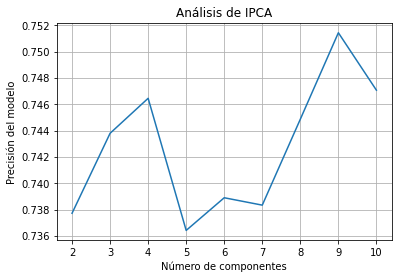

In [95]:
logistic = LogisticRegression(solver='lbfgs')
precisionipca = []

for i in components:
    ipca = IncrementalPCA(n_components = i,batch_size = 10)
    ipca.fit(X_train)
    dt_train = ipca.transform(X_train)
    dt_test = ipca.transform(X_test)
    logistic.fit(dt_train, y_train)
    log_predic = logistic.predict(dt_test)
    score = precision_score(y_test, log_predic)
    precisionipca.append(score)
    print(f'Precision IPCA con {i} componentes: {score}')

plt.plot(components, precisionipca)
plt.xlabel('Número de componentes')
plt.ylabel('Precisión del modelo')
plt.title('Análisis de IPCA')
plt.grid()
plt.show()
    

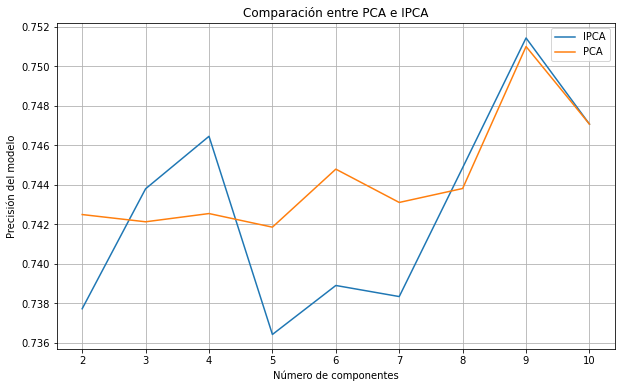

In [107]:
plt.figure(figsize= (10,6))
plt.plot(components, precisionipca, label = 'IPCA')
plt.plot(components, precisionpca, label = 'PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Precisión del modelo')
plt.title('Comparación entre PCA e IPCA')
plt.legend()
plt.grid()
plt.show()